##유방암 데이터 실습

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b014a96b40d5d876cfdda62a2758ef0f496ceaa8c9563601f1fd9e1aa61424d6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
#여러가지 알고리즘 데이터 를 voting 방식으로 합함 

model_lr = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=8)

#model_vot
model_vot = VotingClassifier(estimators=[('LogisticRegression',model_lr),('KNN',model_knn)],voting = 'soft')
#soft 방식이기 때문에 확률 분포로 모든 알고리즘의 확률 분포로 계산 

x = cancer.data
y = cancer.target

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

#voting 분류기 학습/예측/평가
model_vot.fit(train_x,train_y)
print(model_vot.score(train_x,train_y),model_vot.score(test_x,test_y))

0.9538461538461539 0.956140350877193


In [4]:
#개별 모델 학습 예측 평가 
model_lr.fit(train_x,train_y)
print(model_lr.score(train_x,train_y),model_lr.score(test_x,test_y))

model_knn.fit(train_x,train_y)
print(model_knn.score(train_x,train_y),model_knn.score(test_x,test_y))

0.9494505494505494 0.9473684210526315
0.9384615384615385 0.9473684210526315


##RandomForest 학습 


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
train_x,test_x,train_y,test_y = train_test_split(x,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

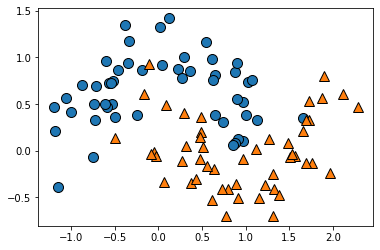

In [6]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

In [7]:
#random Forest 학습 
model = RandomForestClassifier(n_estimators=5,random_state = 0)
model.fit(train_x,train_y)
'''
n_estimators = 랜덤 포레스트에 있는 트리의 개수 
'''

'\nn_estimators = 랜덤 포레스트에 있는 트리의 개수 \n'

In [8]:
model.estimators_ #모든 랜덤 포레스트 의 트리의 정보 를 보여준다

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

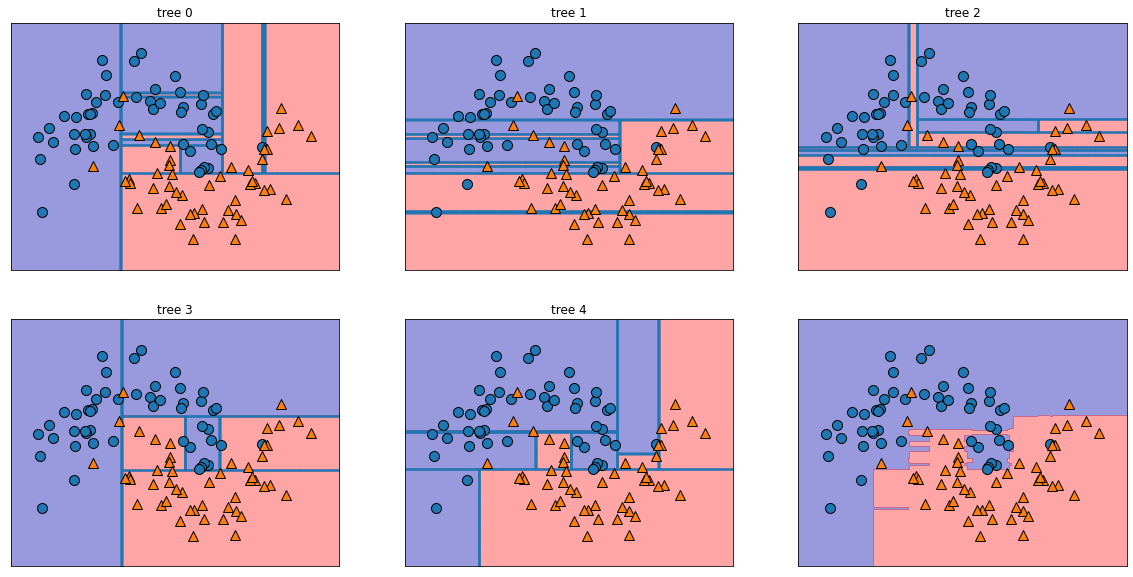

In [9]:
# 결정 경계 시각화
# 다섯 개의 결정트리 결정 경계
# ravel() 다차원 배열(array)을 1차원 배열로 평평하게 NumPy의 함수
# reshape() 함수와 반대의 기능을 하는 함수
fig,axes = plt.subplots(2,3,figsize = (20,10))
for i,(tree,ax) in enumerate(zip(model.estimators_ , axes.ravel())):
  mglearn.plots.plot_tree_partition(x,y,tree,ax = ax)
  ax.set_title(f'tree {i}')

# 랜덤포레스트로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model,x,ax = axes[-1,-1],fill = True,alpha=0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

##유방암 데이터를 통한 랜덤 포레스트 사용

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)


#model 학습 
model = RandomForestClassifier(n_estimators=100,max_depth = 2,random_state = 0) #tree 개수 100개 깊이 2
model.fit(train_x,train_y)

#평가 
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.960093896713615 0.958041958041958


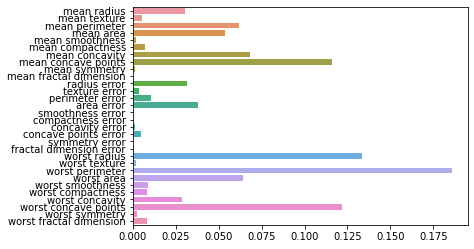

In [11]:
import numpy as np
import seaborn as sns 

sns.barplot(model.feature_importances_,y = cancer.feature_names)
#100번의 트리 학습의 특성 중요도를 나타낸것이다 

##붓꽃 데이터 로 RandomForest 만들기

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

iris = load_iris()
train_x,test_x,train_y,test_y = train_test_split(iris.data,iris.target,test_size = 0.2 , random_state = 11)


model = RandomForestClassifier(n_estimators=1000,max_depth= 2 , random_state = 0).fit(train_x,train_y)
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.9583333333333334 0.9333333333333333


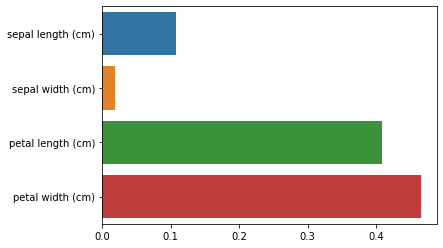

In [13]:
import seaborn as sns 
sns.barplot(x = model.feature_importances_ , y = iris.feature_names)

In [16]:
# 모델 학습
model = RandomForestClassifier(random_state=0,max_features=3,oob_score=True,bootstrap=True,max_depth=3)
model.fit(train_x,train_y)
# 평가
pred = model.predict(test_x)
 
model.score(test_x,test_y)

print(model.score(train_x,train_y))
print(model.oob_score_)#남은 샘플의 평가 지표
print(model.score(test_x,test_y))

0.975
0.9583333333333334
0.9333333333333333


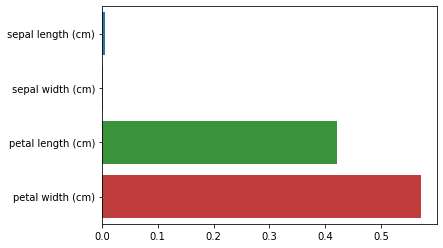

In [17]:
#특성 중요도 체크
sns.barplot(model.feature_importances_,y = iris.feature_names) #max_feature 의 수에 따라 중요도가 완전 달라진다.